# <center> ZCYY4: Modelling and Evaluation

In [1]:
!pip install xgboost
!pip install scikit-learn
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
import math
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import tree
from IPython.display import Image
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

# Pre-Processing

In [3]:
#loading data
centrepoint_df = pd.read_csv('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/final_merged_df.csv')

In [4]:
centrepoint_df.head()

,housing_timeline_id,inform_housing_timeline_id,record_type_id,client_id,service_id,days_in_service,eet_on_arrival,days_in_service_band,eet_on_departure,move_to_live_independently,...,needed_support_to_maintain_accomodation,needed_support_to_minimize_harm/risk_of_harm_from_others,num_outcome_star_sessions_cp_offered,num_attended_keywork_sessions_per_day_in_service,num_keywork_sessions_offered_per_day_in_service,num_keyworkers_per_day_in_service,num_health_sessions_offered_per_day_in_service,num_attended_health_sessions_per_day_in_service,num_attended_outcome_star_sessions_per_day_in_service,num_outcome_star_sessions_offered_per_day_in_service
0,a0j0800000VteC0AAJ,TE-115222,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,63,No,Months 0-3,Yes,1,...,Yes,Yes,1,0.000000,0.174603,0.063492,0.0,0.0,0.015873,0.015873
1,a0j1p00000Ml58MAAR,TE-101776,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,216,No,Months 6-12,Yes,1,...,Yes,No,7,0.125000,0.162037,0.013889,0.0,0.0,0.027778,0.032407
2,a0j0800000MlJ6zAAF,TE-104409,0121p0000002veiAAA,0031p00001WMyyYAAT,001F00000135zyCIAQ,93,No,Months 3-6,Yes,0,...,Yes,No,3,0.215054,0.215054,0.010753,0.0,0.0,0.032258,0.032258
3,a0j0800000VuBCPAA3,TE-118603,0121p0000002veiAAA,0031p000024xnxKAAQ,001F00000135zyCIAQ,92,No,Months 3-6,No,1,...,Unknown,Unknown,4,0.184783,0.228261,0.021739,0.0,0.0,0.043478,0.043478
4,a0j0800000VtgPBAAZ,TE-115787,0121p0000002veiAAA,0030800002Jb9IsAAJ,001F00000135zyCIAQ,116,Yes,Months 3-6,Yes,0,...,Yes,Unknown,3,0.120690,0.146552,0.008621,0.0,0.0,0.025862,0.025862


In [5]:
column_names = centrepoint_df.columns.tolist()
print(column_names)

['housing_timeline_id', 'inform_housing_timeline_id', 'record_type_id', 'client_id', 'service_id', 'days_in_service', 'eet_on_arrival', 'days_in_service_band', 'eet_on_departure', 'move_to_live_independently', 'housing_timeline_start_date', 'housing_timeline_end_date', 'gender', 'is_care_leaver', 'ever_convicted_of_an_offence?', 'ever_run_away_from_home_under_16?', 'ever_slept_rough?', 'keyworker_id', 'economic_status', 'age_on_arrival', 'support_type', 'support_needs_level', 'frequency_of_action_plan/outcomes star', 'service_region', 'needed_support_to_obtain_paid_work', 'needed_support_with_education_and_training', 'needed_support_with_mental_health', 'needed_support_with_substance_misuse_issues', 'needed_support_to_manage_self_harm', 'needed_support_to_maintain_accomodation', 'needed_support_to_minimize_harm/risk_of_harm_from_others', 'num_outcome_star_sessions_cp_offered', 'num_attended_keywork_sessions_per_day_in_service', 'num_keywork_sessions_offered_per_day_in_service', 'num_ke

In [6]:
# getting rid of irrelevant/individual columns
columns_to_drop = ['housing_timeline_id', 'inform_housing_timeline_id',  'housing_timeline_start_date', 'housing_timeline_end_date','keyworker_id', 'record_type_id','client_id','service_id'] 
centrepoint_df = centrepoint_df.drop(columns_to_drop, axis=1)


In [7]:
# checking data types
centrepoint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   days_in_service                                           2799 non-null   int64  
 1   eet_on_arrival                                            2799 non-null   object 
 2   days_in_service_band                                      2799 non-null   object 
 3   eet_on_departure                                          2799 non-null   object 
 4   move_to_live_independently                                2799 non-null   int64  
 5   gender                                                    2799 non-null   object 
 6   is_care_leaver                                            2799 non-null   object 
 7   ever_convicted_of_an_offence?                             2799 non-null   object 
 8   ever_run_away_from

In [8]:
num_cols = ['num_attended_keywork_sessions_per_day_in_service',
       'num_keywork_sessions_offered_per_day_in_service',
       'num_health_sessions_offered_per_day_in_service',
       'num_attended_health_sessions_per_day_in_service',
       'num_attended_outcome_star_sessions_per_day_in_service',
       'num_outcome_star_sessions_offered_per_day_in_service',
        'num_keyworkers_per_day_in_service']

# Select only the numeric columns from the dataframe
numeric_columns = centrepoint_df[num_cols]

In [9]:
numeric_columns.describe()

,num_attended_keywork_sessions_per_day_in_service,num_keywork_sessions_offered_per_day_in_service,num_health_sessions_offered_per_day_in_service,num_attended_health_sessions_per_day_in_service,num_attended_outcome_star_sessions_per_day_in_service,num_outcome_star_sessions_offered_per_day_in_service,num_keyworkers_per_day_in_service
count,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000
mean,0.036428,0.049428,0.000562,0.003453,0.010084,0.012636,0.007593
std,0.056055,0.063033,0.003897,0.014483,0.012747,0.012989,0.010361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.010650,0.029197,0.000000,0.000000,0.003344,0.009825,0.004348
75%,0.050953,0.071201,0.000000,0.000000,0.018519,0.022253,0.009852
max,0.440860,0.440860,0.081967,0.224490,0.070175,0.070175,0.076923


In [10]:
centrepoint_df = centrepoint_df.rename(columns={'ever_convicted_of_an_offence?': 'ever_convicted_of_an_offence'})
centrepoint_df = centrepoint_df.rename(columns={'ever_run_away_from_home_under_16?': 'ever_run_away_from_home_under_16'})
centrepoint_df = centrepoint_df.rename(columns={'ever_slept_rough?': 'ever_slept_rough'})
centrepoint_df = centrepoint_df.rename(columns={'needed_support_to_minimize_harm/risk_of_harm_from_others': 'needed_support_to_minimize_harm_or_risk_of_harm_from_others'})
centrepoint_df = centrepoint_df.rename(columns={'frequency_of_action_plan/outcomes star': 'frequency_of_action_plan_or_outcomes_star'})

In [11]:
print(centrepoint_df.columns)

Index(['days_in_service', 'eet_on_arrival', 'days_in_service_band',
       'eet_on_departure', 'move_to_live_independently', 'gender',
       'is_care_leaver', 'ever_convicted_of_an_offence',
       'ever_run_away_from_home_under_16', 'ever_slept_rough',
       'economic_status', 'age_on_arrival', 'support_type',
       'support_needs_level', 'frequency_of_action_plan_or_outcomes_star',
       'service_region', 'needed_support_to_obtain_paid_work',
       'needed_support_with_education_and_training',
       'needed_support_with_mental_health',
       'needed_support_with_substance_misuse_issues',
       'needed_support_to_manage_self_harm',
       'needed_support_to_maintain_accomodation',
       'needed_support_to_minimize_harm_or_risk_of_harm_from_others',
       'num_outcome_star_sessions_cp_offered',
       'num_attended_keywork_sessions_per_day_in_service',
       'num_keywork_sessions_offered_per_day_in_service',
       'num_keyworkers_per_day_in_service',
       'num_health_sess

# EDA (Data Visualizations)

In [12]:
num_cols = ['num_attended_keywork_sessions_per_day_in_service',
       'num_keywork_sessions_offered_per_day_in_service',
       'num_health_sessions_offered_per_day_in_service',
       'num_attended_health_sessions_per_day_in_service',
       'num_attended_outcome_star_sessions_per_day_in_service',
       'num_outcome_star_sessions_offered_per_day_in_service',
        'num_keyworkers_per_day_in_service',
        'age_on_arrival',
        'days_in_service']

categorical_colsz = ['eet_on_arrival','eet_on_departure','move_to_live_independently',
                    'gender',
                    'days_in_service_band', 'is_care_leaver', 
                    'ever_convicted_of_an_offence', 'ever_run_away_from_home_under_16', 'ever_slept_rough', 
                    'economic_status', 'support_type', 
                    'support_needs_level',   
                    'needed_support_to_obtain_paid_work',
                    'needed_support_with_education_and_training',
                    'needed_support_with_mental_health',
                    'needed_support_with_substance_misuse_issues',
                    'needed_support_to_manage_self_harm',
                    'needed_support_to_maintain_accomodation',
                    'needed_support_to_minimize_harm_or_risk_of_harm_from_others', 
                    'frequency_of_action_plan_or_outcomes_star', 'service_region']

### Categorical Variables

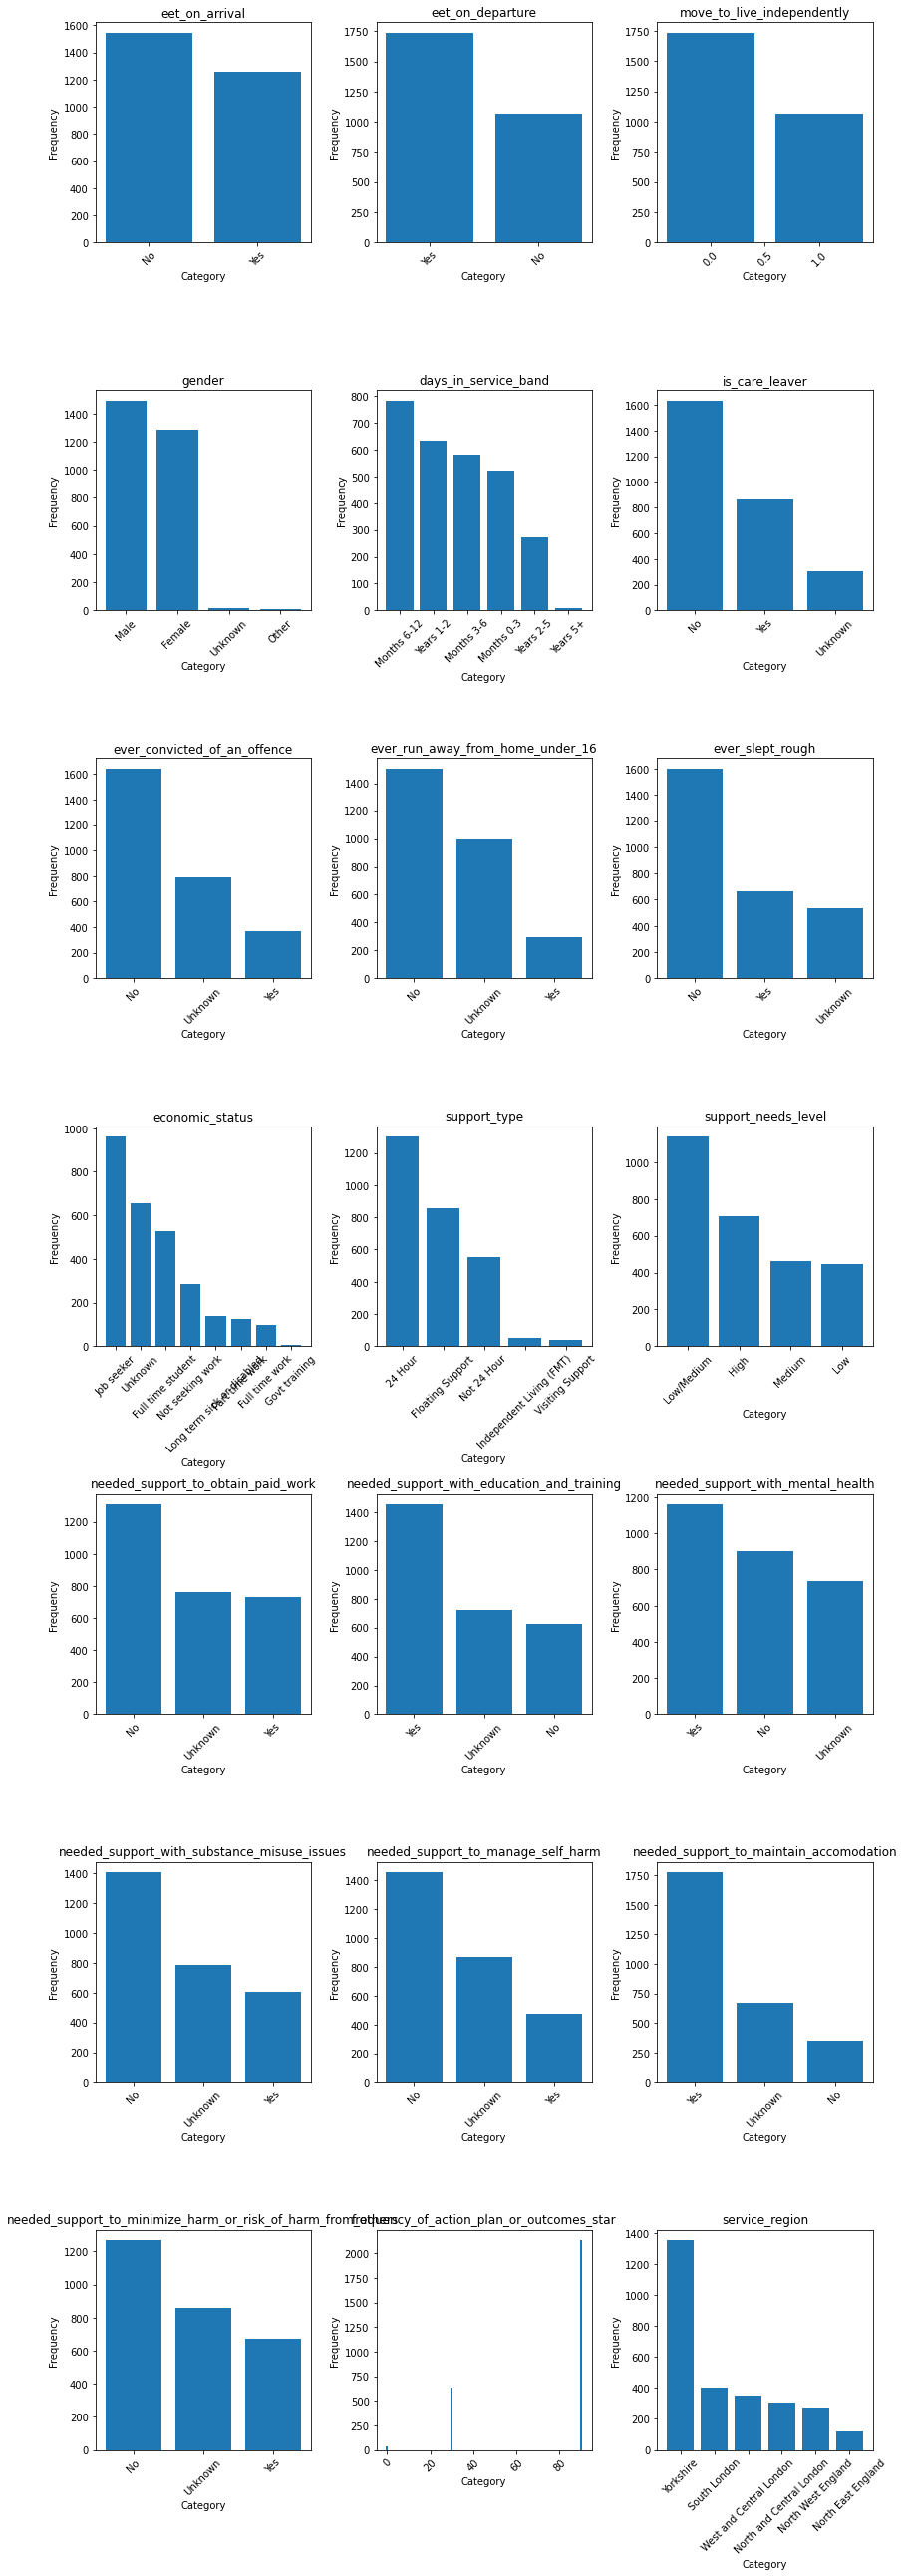

In [13]:
plt.rcParams['figure.figsize'] = [12, 36]  # Adjust the figure size as desired

# Create subplots with 6 rows and 6 columns
fig, axes = plt.subplots(nrows=7, ncols=3)

# Flatten the axes array
axes = axes.flatten()

# Iterate over categorical columns and plot value counts bar charts
for i, col in enumerate(categorical_colsz):
    axes[i].bar(centrepoint_df[col].value_counts().index, centrepoint_df[col].value_counts().values)
    axes[i].set_title(col)
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

### Numerical Variables

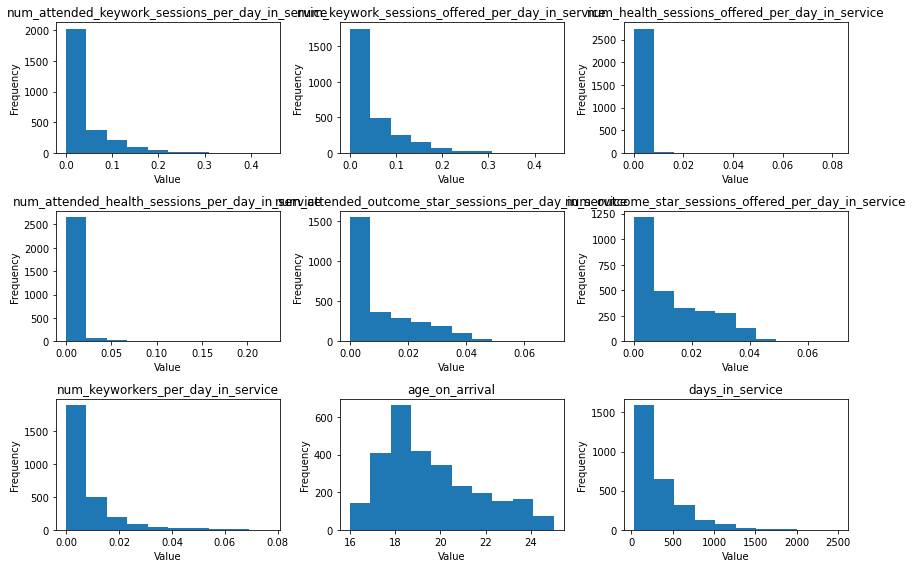

In [14]:
plt.rcParams['figure.figsize'] = [12, 8]  # Adjust the figure size as desired

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3)

# Flatten the axes array
axes = axes.flatten()

# Iterate over numerical columns and plot histograms
for i, col in enumerate(num_cols):
    axes[i].hist(centrepoint_df[col])
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

In [15]:
skewness = centrepoint_df[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print(skewness)

num_health_sessions_offered_per_day_in_service           11.589400
num_attended_health_sessions_per_day_in_service           6.905654
num_keyworkers_per_day_in_service                         2.532642
num_attended_keywork_sessions_per_day_in_service          2.307894
num_keywork_sessions_offered_per_day_in_service           1.992653
days_in_service                                           1.915091
num_attended_outcome_star_sessions_per_day_in_service     1.159287
num_outcome_star_sessions_offered_per_day_in_service      0.824709
age_on_arrival                                            0.667359
dtype: float64


In [16]:
centrepoint_df = centrepoint_df.drop(['num_attended_health_sessions_per_day_in_service', 'num_health_sessions_offered_per_day_in_service','days_in_service'], axis=1)

In [17]:
centrepoint_df = centrepoint_df.drop(['num_outcome_star_sessions_cp_offered'], axis=1)

In [18]:
print(centrepoint_df.columns)

Index(['eet_on_arrival', 'days_in_service_band', 'eet_on_departure',
       'move_to_live_independently', 'gender', 'is_care_leaver',
       'ever_convicted_of_an_offence', 'ever_run_away_from_home_under_16',
       'ever_slept_rough', 'economic_status', 'age_on_arrival', 'support_type',
       'support_needs_level', 'frequency_of_action_plan_or_outcomes_star',
       'service_region', 'needed_support_to_obtain_paid_work',
       'needed_support_with_education_and_training',
       'needed_support_with_mental_health',
       'needed_support_with_substance_misuse_issues',
       'needed_support_to_manage_self_harm',
       'needed_support_to_maintain_accomodation',
       'needed_support_to_minimize_harm_or_risk_of_harm_from_others',
       'num_attended_keywork_sessions_per_day_in_service',
       'num_keywork_sessions_offered_per_day_in_service',
       'num_keyworkers_per_day_in_service',
       'num_attended_outcome_star_sessions_per_day_in_service',
       'num_outcome_star_session

In [19]:
print(centrepoint_df.shape)

(2799, 27)


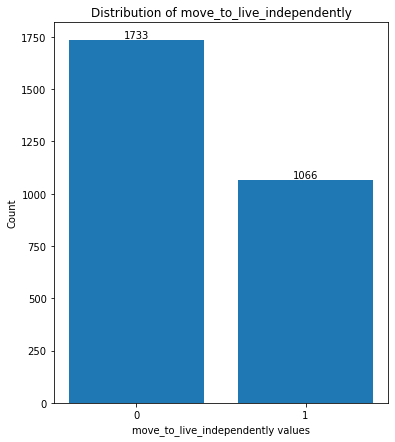

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value
value_counts = centrepoint_df['move_to_live_independently'].value_counts()

# Set the figure size
plt.figure(figsize=(6, 7))

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('move_to_live_independently values')
plt.ylabel('Count')
plt.title('Distribution of move_to_live_independently')
plt.xticks(value_counts.index)  # Set x-axis ticks to the unique values

# Add count values on top of the bars
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Modelling

#### Data Split

In [21]:
# Separate the features (X) and the target variable (y)
X = centrepoint_df.drop('move_to_live_independently', axis=1)
y = centrepoint_df['move_to_live_independently']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Encoding Categorical Variables

In [22]:
# Define the list of categorical columns
categorical_cols = ['eet_on_arrival', 'eet_on_departure', 'gender', 'days_in_service_band', 'is_care_leaver',
                       'ever_convicted_of_an_offence', 'ever_run_away_from_home_under_16', 'ever_slept_rough',
                       'economic_status', 'support_type', 'support_needs_level',
                       'needed_support_to_obtain_paid_work', 'needed_support_with_education_and_training',
                       'needed_support_with_mental_health', 'needed_support_with_substance_misuse_issues',
                       'needed_support_to_manage_self_harm', 'needed_support_to_maintain_accomodation',
                       'needed_support_to_minimize_harm_or_risk_of_harm_from_others',
                       'frequency_of_action_plan_or_outcomes_star', 'service_region']

# Encode categorical variables using get_dummies for training set
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)

# Encode categorical variables using get_dummies for test set
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

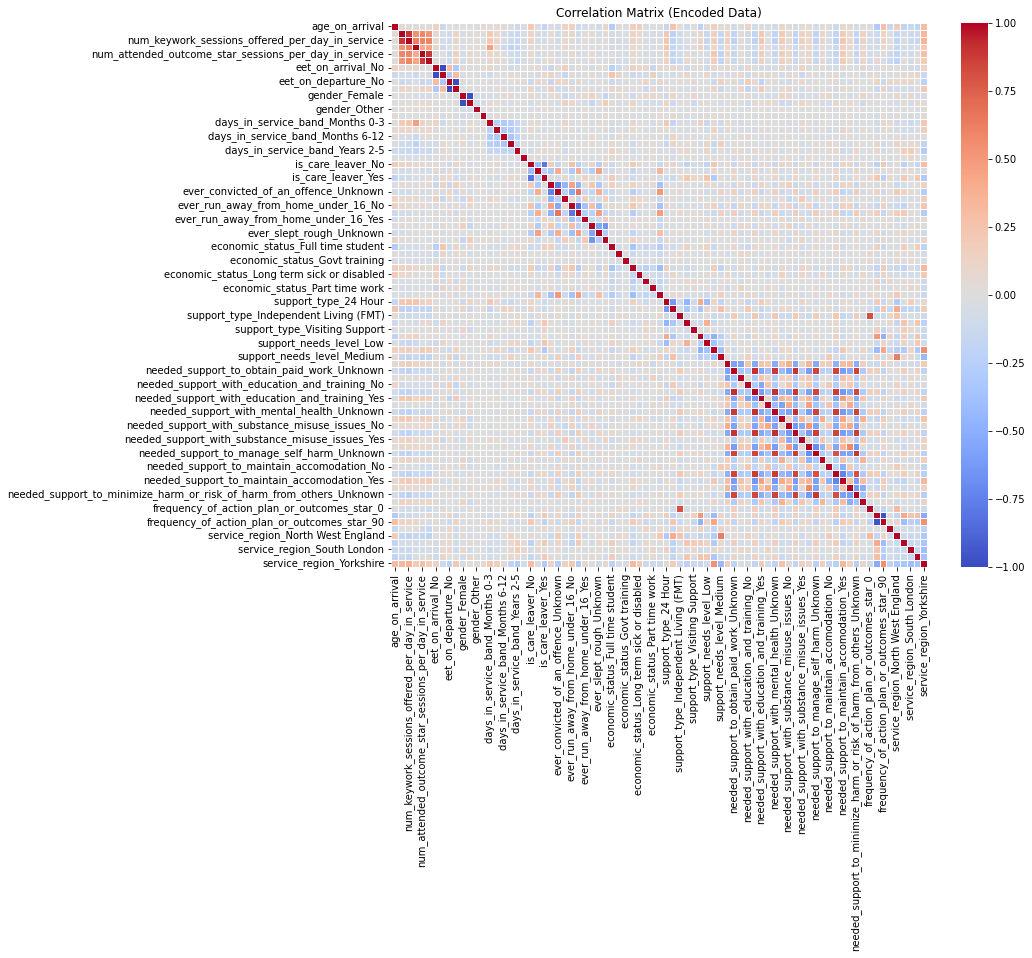

In [23]:
# Combine the features (X_train and X_test) and the target variable (y_train and y_test)
X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = pd.concat([y_train, y_test], axis=0)

# Encode categorical variables using get_dummies for combined data
X_combined_encoded = pd.get_dummies(X_combined, columns=categorical_cols)

# Compute the correlation matrix for combined encoded data
corr_matrix = X_combined_encoded.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Encoded Data)')

plt.show()

### Baseline Models

#### Logistic Regression

In [24]:
np.random.seed(9)

# Define the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train_encoded, y_train)

# Predict on the test data
y_pred_lr = logreg.predict(X_test_encoded)

# Evaluate the model
accuracy_lr = logreg.score(X_test_encoded, y_test)
print("Accuracy:", accuracy_lr)

# Generate and print the classification report
report = classification_report(y_test, y_pred_lr)
print("\nClassification Report:")
print(report)

Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       327
           1       0.61      0.45      0.52       233

    accuracy                           0.65       560
   macro avg       0.64      0.62      0.62       560
weighted avg       0.64      0.65      0.64       560



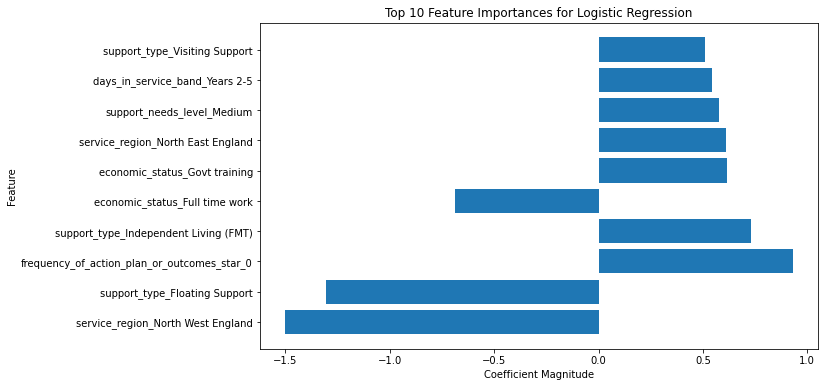

In [25]:
# Get the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X_train_encoded.columns

# Sort the coefficients in descending order
indices = np.argsort(np.abs(coefficients))[::-1]

# Select the top 10 coefficients and corresponding feature names
top_10_coefficients = coefficients[indices][:10]
top_10_feature_names = feature_names[indices][:10]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_10_coefficients, align='center')
plt.yticks(range(10), top_10_feature_names)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances for Logistic Regression')
plt.show()

#### Random Forest

In [26]:
np.random.seed(9)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train_encoded, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test_encoded)

# Evaluate the model
accuracy_rf = rf_classifier.score(X_test_encoded, y_test)
print("Accuracy:", accuracy_rf)

# Generate and print the classification report
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(report)

Accuracy: 0.6892857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       327
           1       0.66      0.52      0.58       233

    accuracy                           0.69       560
   macro avg       0.68      0.66      0.67       560
weighted avg       0.69      0.69      0.68       560



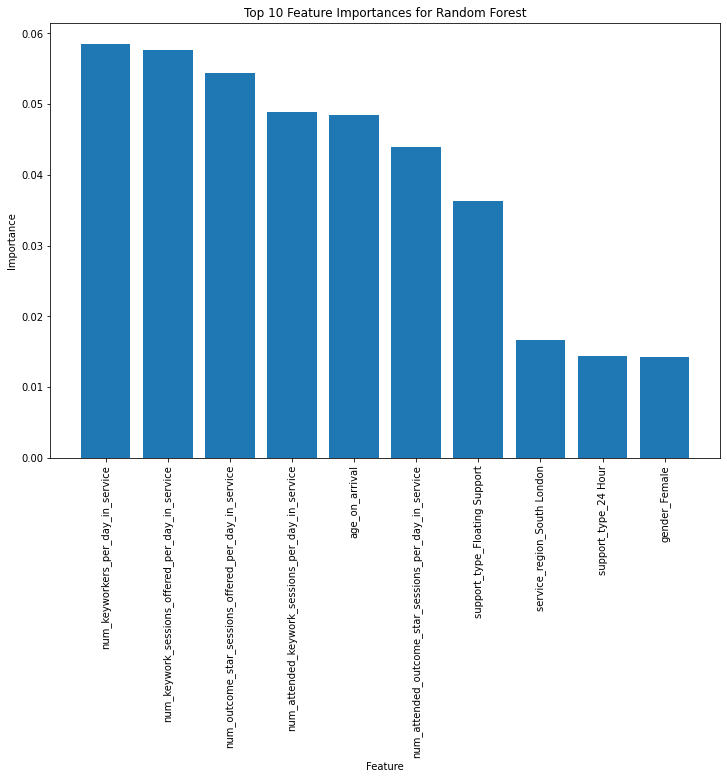

In [27]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names
feature_names = X_train_encoded.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select top 10 feature importances and corresponding names
top_10_importances = importances[indices][:10]
top_10_feature_names = feature_names[indices][:10]

# Plot top 10 feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_10_importances)), top_10_importances)
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances for Random Forest')
plt.show()


#### Decision Tree

In [28]:
np.random.seed(9)

# Define the decision tree model
decision_tree = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree.fit(X_train_encoded, y_train)

# Predict on the test data
y_pred_dt = decision_tree.predict(X_test_encoded)

# Evaluate the model
accuracy_dt = decision_tree.score(X_test_encoded, y_test)
print("Accuracy:", accuracy_dt)

# Generate and print the classification report
report = classification_report(y_test, y_pred_dt)
print("\nClassification Report:")
print(report)

Accuracy: 0.6375

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       327
           1       0.57      0.53      0.55       233

    accuracy                           0.64       560
   macro avg       0.63      0.62      0.62       560
weighted avg       0.63      0.64      0.64       560



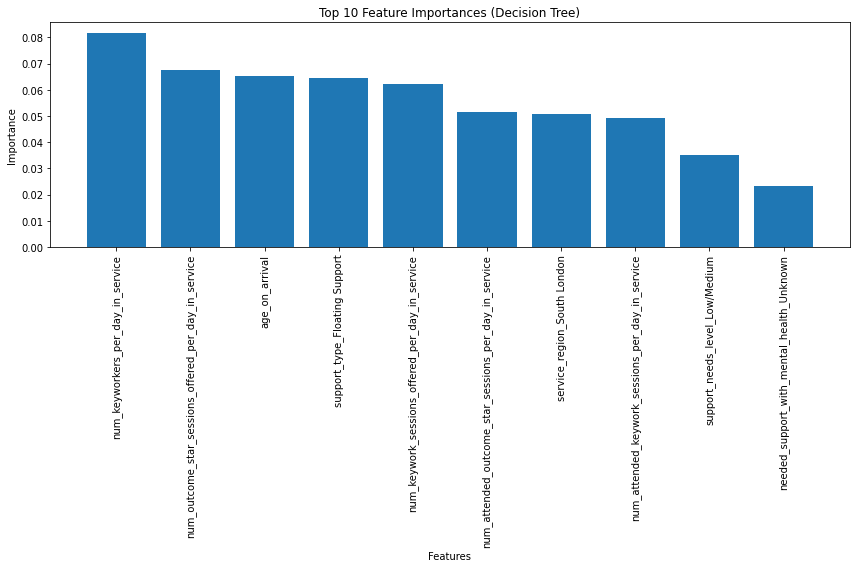

In [29]:
# Get feature importances
importances = decision_tree.feature_importances_

# Create a dataframe to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df.head(10)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(top_10_features['Feature'], top_10_features['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.tight_layout()
plt.show()


#### XGBoost

In [30]:
np.random.seed(9)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_encoded, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test_encoded)

# Evaluate the model
accuracy_xgb = xgb_model.score(X_test_encoded, y_test)
print("Accuracy (XGBoost):", accuracy_xgb)

# Generate and print the classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print("\nClassification Report (XGBoost):")
print(report_xgb)

Accuracy (XGBoost): 0.6642857142857143

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       327
           1       0.61      0.52      0.56       233

    accuracy                           0.66       560
   macro avg       0.65      0.64      0.65       560
weighted avg       0.66      0.66      0.66       560



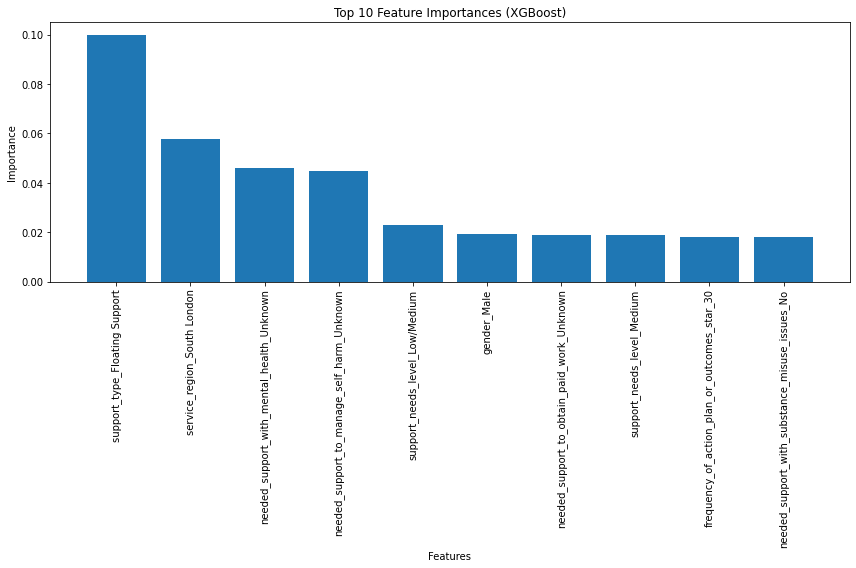

In [31]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_encoded, y_train)

# Get feature importances
importances = xgb_model.feature_importances_

# Create a dataframe to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df.head(10)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(top_10_features['Feature'], top_10_features['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

#### Neural Network

In [32]:
np.random.seed(9)

# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50,25), activation='relu', solver='adam', random_state=42, max_iter=500)

# Fit the model on the training data
mlp.fit(X_train_encoded, y_train)

# Predict on the test data
y_pred_mlp = mlp.predict(X_test_encoded)

# Evaluate the model
accuracy_mlp = mlp.score(X_test_encoded, y_test)
print("Accuracy:", accuracy_mlp)

# Generate and print the classification report
report = classification_report(y_test, y_pred_mlp)
print("\nClassification Report:")
print(report)

Accuracy: 0.6232142857142857

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       327
           1       0.54      0.58      0.56       233

    accuracy                           0.62       560
   macro avg       0.62      0.62      0.62       560
weighted avg       0.63      0.62      0.62       560



## Comparing Baseline Models

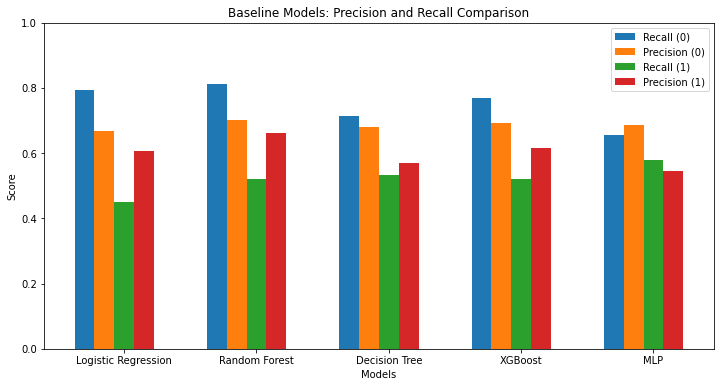

In [33]:
# Calculate precision and recall for Logistic Regression
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
precision_lr = report_lr['weighted avg']['precision']
recall_lr = report_lr['weighted avg']['recall']

# Calculate precision and recall for Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
precision_rf = report_rf['weighted avg']['precision']
recall_rf = report_rf['weighted avg']['recall']

# Calculate precision and recall for Decision Tree
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
precision_dt = report_dt['weighted avg']['precision']
recall_dt = report_dt['weighted avg']['recall']

# Calculate precision and recall for XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
precision_xgb = report_xgb['weighted avg']['precision']
recall_xgb = report_xgb['weighted avg']['recall']

# Calculate precision and recall for MLP
report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
precision_mlp = report_mlp['weighted avg']['precision']
recall_mlp = report_mlp['weighted avg']['recall']

# Define the model names and class labels
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'MLP']
class_labels = list(report_lr.keys())[:-3]  # Get the class labels from any report

# Set the width of the bars and spacing between groups
bar_width = 0.15
spacing = 0.3

# Calculate the total width required for each group of bars
total_width = bar_width * len(class_labels) + spacing * (len(class_labels) - 1)

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
x = np.arange(len(model_names))

for i, class_label in enumerate(class_labels):
    precision_values = [report_lr[class_label]['precision'], report_rf[class_label]['precision'],
                        report_dt[class_label]['precision'], report_xgb[class_label]['precision'],
                        report_mlp[class_label]['precision']]
    recall_values = [report_lr[class_label]['recall'], report_rf[class_label]['recall'],
                     report_dt[class_label]['recall'], report_xgb[class_label]['recall'],
                     report_mlp[class_label]['recall']]
    offset = (i - len(class_labels) / 2) * total_width / len(class_labels)

    plt.bar(x + offset, recall_values, width=bar_width, label=f'Recall ({class_label})')
    plt.bar(x + offset + bar_width, precision_values, width=bar_width, label=f'Precision ({class_label})')

# Adjust the x-axis ticks and labels
x_ticks = x
plt.xticks(x_ticks, model_names)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Baseline Models: Precision and Recall Comparison')
plt.ylim(0, 1)  # Set the y-axis limits
plt.legend()
plt.show()


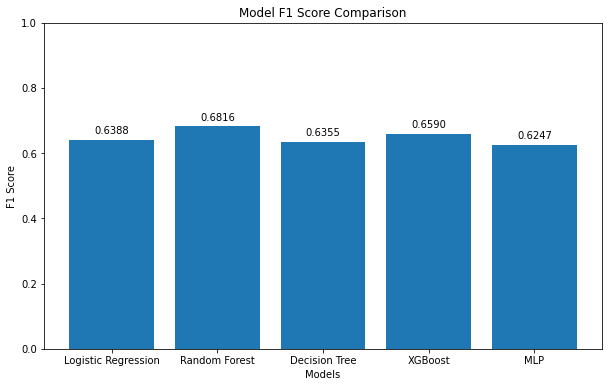

In [34]:
# with numbers on top of bars in diagram
# Calculate F1 score for each model
f1_scores = [f1_score(y_test, y_pred_lr, average='weighted'),
             f1_score(y_test, y_pred_rf, average='weighted'),
             f1_score(y_test, y_pred_dt, average='weighted'),
             f1_score(y_test, y_pred_xgb, average='weighted'),
             f1_score(y_test, y_pred_mlp, average='weighted')]

# Define the model names
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'MLP']

# Format the F1 scores to 4 decimal places
formatted_scores = [f'{score:.4f}' for score in f1_scores]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')

# Add text labels on top of the bars
for i, score in enumerate(formatted_scores):
    plt.text(i, f1_scores[i] + 0.02, score, ha='center')

plt.ylim(0, 1)  # Set the y-axis limits
plt.show()


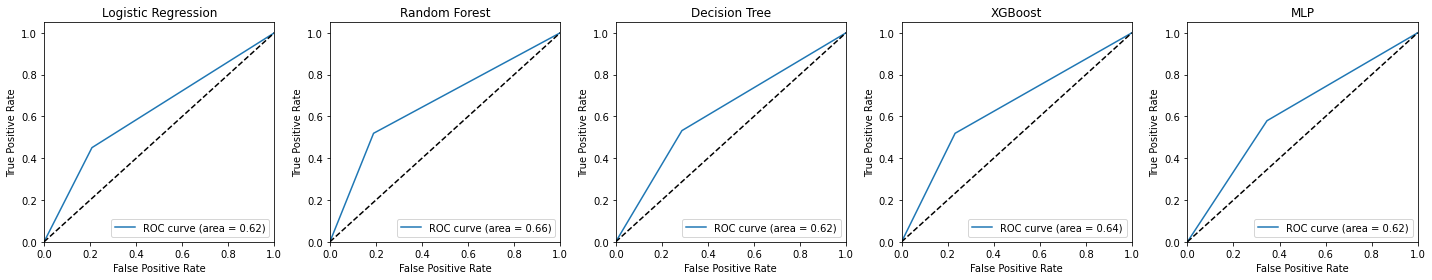

In [35]:
# Calculate ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Plot ROC curve and AUC for each model
axes[0].plot(fpr_lr, tpr_lr, label='ROC curve (area = %0.2f)' % roc_auc_lr)
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Logistic Regression')
axes[0].legend(loc="lower right")

axes[1].plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Random Forest')
axes[1].legend(loc="lower right")

axes[2].plot(fpr_dt, tpr_dt, label='ROC curve (area = %0.2f)' % roc_auc_dt)
axes[2].plot([0, 1], [0, 1], 'k--')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Decision Tree')
axes[2].legend(loc="lower right")

axes[3].plot(fpr_xgb, tpr_xgb, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
axes[3].plot([0, 1], [0, 1], 'k--')
axes[3].set_xlim([0.0, 1.0])
axes[3].set_ylim([0.0, 1.05])
axes[3].set_xlabel('False Positive Rate')
axes[3].set_ylabel('True Positive Rate')
axes[3].set_title('XGBoost')
axes[3].legend(loc="lower right")

axes[4].plot(fpr_mlp, tpr_mlp, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
axes[4].plot([0, 1], [0, 1], 'k--')
axes[4].set_xlim([0.0, 1.0])
axes[4].set_ylim([0.0, 1.05])
axes[4].set_xlabel('False Positive Rate')
axes[4].set_ylabel('True Positive Rate')
axes[4].set_title('MLP')
axes[4].legend(loc="lower right")

plt.tight_layout()
plt.show()

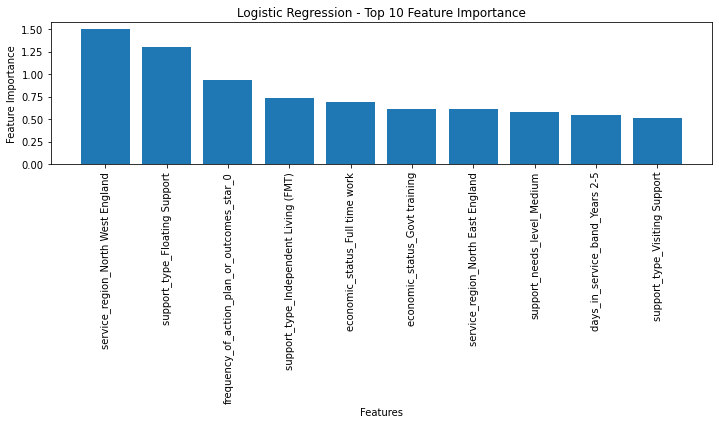

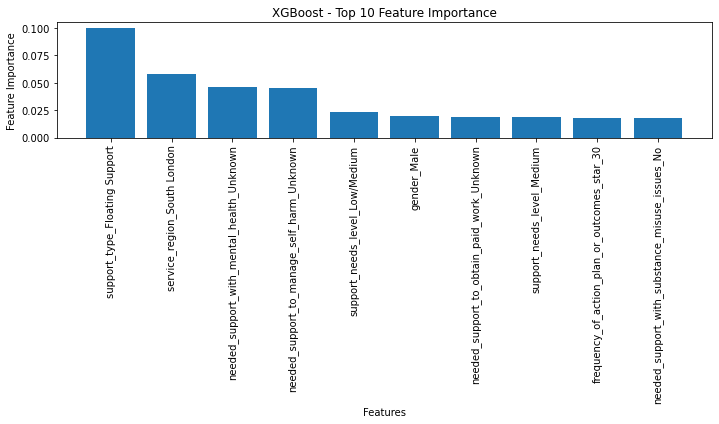

In [36]:
importances_lr = np.abs(logreg.coef_[0])
importances_xgb = xgb_model.feature_importances_

# Sort feature importances in descending order
indices_lr = np.argsort(importances_lr)[::-1][:10]
indices_xgb = np.argsort(importances_xgb)[::-1][:10]

# Rearrange feature names based on feature importances
names_lr = [X_train_encoded.columns[i] for i in indices_lr]
names_xgb = [X_train_encoded.columns[i] for i in indices_xgb]

# Get top 10 feature importances
importances_lr_top = importances_lr[indices_lr]
importances_xgb_top = importances_xgb[indices_xgb]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(indices_lr)), importances_lr_top, align='center')
plt.xticks(range(len(indices_lr)), names_lr, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Logistic Regression - Top 10 Feature Importance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(len(indices_xgb)), importances_xgb_top, align='center')
plt.xticks(range(len(indices_xgb)), names_xgb, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('XGBoost - Top 10 Feature Importance')
plt.tight_layout()
plt.show()


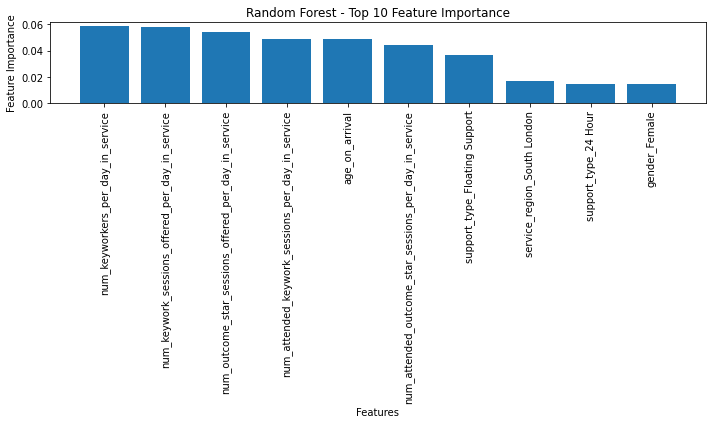

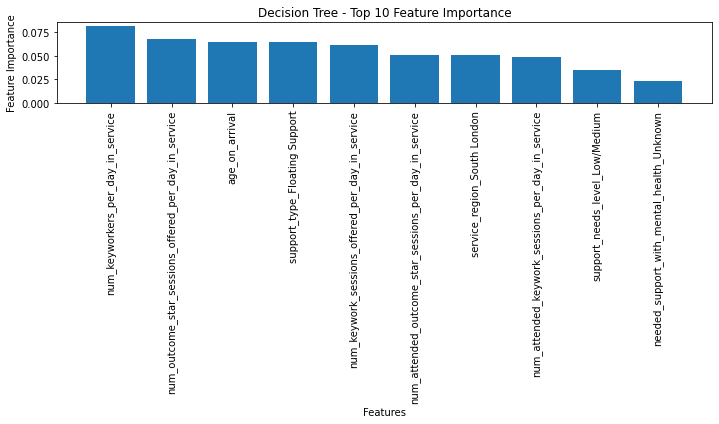

In [37]:
importances_rf = rf_classifier.feature_importances_
importances_dt = decision_tree.feature_importances_

# Sort feature importances in descending order
indices_rf = np.argsort(importances_rf)[::-1][:10]
indices_dt = np.argsort(importances_dt)[::-1][:10]

# Rearrange feature names based on feature importances
names_rf = [X_train_encoded.columns[i] for i in indices_rf]
names_dt = [X_train_encoded.columns[i] for i in indices_dt]

# Get top 10 feature importances
importances_rf_top = importances_rf[indices_rf]
importances_dt_top = importances_dt[indices_dt]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(indices_rf)), importances_rf_top, align='center')
plt.xticks(range(len(indices_rf)), names_rf, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest - Top 10 Feature Importance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(len(indices_dt)), importances_dt_top, align='center')
plt.xticks(range(len(indices_dt)), names_dt, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Decision Tree - Top 10 Feature Importance')
plt.tight_layout()
plt.show()

## Class Imbalance Techniques

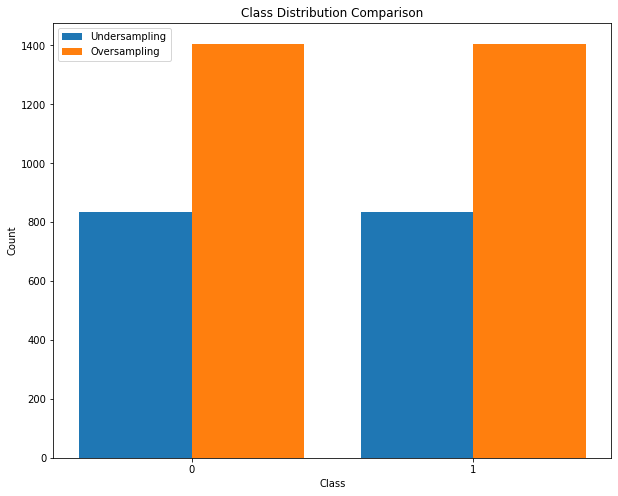

In [38]:
# Set the random seed
np.random.seed(9)

# Perform random under-sampling on the majority class
rus = RandomUnderSampler(random_state=9)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_encoded, y_train)

# Count the occurrences of each class in the undersampled data
class_counts_undersampled = np.bincount(y_train_resampled)

# Perform SMOTE oversampling on the minority class
smote = SMOTE(random_state=9)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_encoded, y_train)

# Count the occurrences of each class in the oversampled data
class_counts_oversampled = np.bincount(y_train_oversampled)

# Get the class labels
class_labels = np.unique(y_train_resampled)

# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.bar(class_labels - 0.2, class_counts_undersampled, width=0.4, align='center', label='Undersampling')
plt.bar(class_labels + 0.2, class_counts_oversampled, width=0.4, align='center', label='Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Comparison')
plt.xticks(class_labels)
plt.legend()
plt.show()


### Undersampling with Random Forest

In [39]:
# Set the random seed
np.random.seed(9)

# Perform random under-sampling on the majority class
rus = RandomUnderSampler(random_state=9)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_encoded, y_train)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test_encoded)

# Calculate the F1 score
f1_rf = f1_score(y_test, y_pred_rf)

# Evaluate the model
accuracy_rf = rf_classifier.score(X_test_encoded, y_test)
print("Accuracy:", accuracy_rf)

# Generate and print the classification report
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(report)

# Print the F1 score
print("F1 Score:", f1_rf)

Accuracy: 0.6785714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.63      0.70       327
           1       0.59      0.74      0.66       233

    accuracy                           0.68       560
   macro avg       0.68      0.69      0.68       560
weighted avg       0.70      0.68      0.68       560

F1 Score: 0.6577946768060836


### Oversampling with Random Forest

In [40]:
from sklearn.metrics import f1_score

# Set the random seed
np.random.seed(9)

# Perform SMOTE oversampling on the minority class
smote = SMOTE(random_state=9)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_encoded, y_train)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the oversampled training data
rf_classifier.fit(X_train_oversampled, y_train_oversampled)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test_encoded)

# Calculate the F1 score
f1_rf = f1_score(y_test, y_pred_rf)

# Print the F1 score
print("F1 Score (Random Forest with SMOTE):", f1_rf)

# Generate and print the classification report
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report (Random Forest with SMOTE):")
print(report)

F1 Score (Random Forest with SMOTE): 0.59375

Classification Report (Random Forest with SMOTE):
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       327
           1       0.62      0.57      0.59       233

    accuracy                           0.68       560
   macro avg       0.66      0.66      0.66       560
weighted avg       0.67      0.68      0.67       560



### Undersampling with Logistic Regression

In [41]:
# Set the random seed
np.random.seed(9)

# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=9)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_encoded, y_train)

# Define the logistic regression model
logreg_undersampled = LogisticRegression(max_iter=1000)

# Fit the model on the undersampled training data
logreg_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predict on the test data
y_pred_lr_undersampled = logreg_undersampled.predict(X_test_encoded)

# Evaluate the model
accuracy_lr_undersampled = logreg_undersampled.score(X_test_encoded, y_test)
print("Accuracy (Undersampled):", accuracy_lr_undersampled)

# Generate and print the classification report
report_undersampled = classification_report(y_test, y_pred_lr_undersampled)
print("\nClassification Report (Undersampled):")
print(report_undersampled)

# Calculate the F1 score
f1_score_lr_undersampled = f1_score(y_test, y_pred_lr_undersampled)
print("F1 Score (Undersampled):", f1_score_lr_undersampled)

Accuracy (Undersampled): 0.6321428571428571

Classification Report (Undersampled):
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       327
           1       0.55      0.69      0.61       233

    accuracy                           0.63       560
   macro avg       0.64      0.64      0.63       560
weighted avg       0.65      0.63      0.63       560

F1 Score (Undersampled): 0.6083650190114068


### Oversampling with Logistic Regression

In [42]:
np.random.seed(9)

# Perform oversampling using SMOTE
smote = SMOTE(random_state=9)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_encoded, y_train)

# Define the logistic regression model
logreg_oversampled = LogisticRegression(max_iter=1000)

# Fit the model on the oversampled training data
logreg_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Predict on the test data
y_pred_lr_oversampled = logreg_oversampled.predict(X_test_encoded)

# Evaluate the model
accuracy_lr_oversampled = logreg_oversampled.score(X_test_encoded, y_test)
print("Accuracy (Oversampled - SMOTE):", accuracy_lr_oversampled)

# Generate and print the classification report
report_oversampled = classification_report(y_test, y_pred_lr_oversampled)
print("\nClassification Report (Oversampled - SMOTE):")
print(report_oversampled)

# Calculate the F1 score
f1_score_lr_oversampled = f1_score(y_test, y_pred_lr_oversampled)
print("F1 Score (Oversampled - SMOTE):", f1_score_lr_oversampled)


Accuracy (Oversampled - SMOTE): 0.6535714285714286

Classification Report (Oversampled - SMOTE):
              precision    recall  f1-score   support

           0       0.68      0.78      0.72       327
           1       0.61      0.48      0.53       233

    accuracy                           0.65       560
   macro avg       0.64      0.63      0.63       560
weighted avg       0.65      0.65      0.65       560

F1 Score (Oversampled - SMOTE): 0.5336538461538461


## Random Search

#### Undersampling Random Forest with Random Search

In [43]:
# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=9)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_encoded, y_train)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=9)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, cv=5, n_iter=100, random_state=9)
random_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best model with optimal hyperparameters
best_rf_classifier = random_search.best_estimator_

# Predict on the test data
y_pred_rf_undersampled_randomsearch = best_rf_classifier.predict(X_test_encoded)

# Calculate the F1 score
f1_rf_undersampled_randomsearch = f1_score(y_test, y_pred_rf)

# Calculate the AUC
auc_rf_undersampled_randomsearch = roc_auc_score(y_test, y_pred_rf_undersampled_randomsearch)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Generate and print the classification report
report = classification_report(y_test, y_pred_rf_undersampled_randomsearch)
print("\nClassification Report:")
print(report)

# Print the F1 score
print("F1 Score:", f1_rf_undersampled_randomsearch)
print("AUC:", auc_rf_undersampled_randomsearch)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 5, 'class_weight': 'balanced'}

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       327
           1       0.59      0.78      0.67       233

    accuracy                           0.68       560
   macro avg       0.69      0.69      0.68       560
weighted avg       0.71      0.68      0.68       560

F1 Score: 0.59375
AUC: 0.6948392854799124


#### Oversampling RF with Random Search

In [44]:
# Perform SMOTE oversampling on the minority class
smote = SMOTE(random_state=9)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_encoded, y_train)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=9)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, cv=5, n_iter=100, random_state=9)
random_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best model with optimal hyperparameters
best_rf_classifier = random_search.best_estimator_

# Predict on the test data
y_pred_rf_oversampled_randomsearch = best_rf_classifier.predict(X_test_encoded)

# Calculate the F1 score
f1_rf_oversampled_randomsearch = f1_score(y_test, y_pred_rf_oversampled_randomsearch)

# Calculate the AUC
auc_rf_oversampled_randomsearch = roc_auc_score(y_test, y_pred_rf)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Generate and print the classification report
report = classification_report(y_test, y_pred_rf_oversampled_randomsearch)
print("\nClassification Report:")
print(report)

# Print the F1 score
print("F1 Score:", f1_rf_oversampled_randomsearch)
print("AUC:", auc_rf_oversampled_randomsearch)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': None}

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       327
           1       0.62      0.58      0.60       233

    accuracy                           0.68       560
   macro avg       0.67      0.66      0.66       560
weighted avg       0.67      0.68      0.68       560

F1 Score: 0.6004415011037527
AUC: 0.6600254623249466


#### Undersampling Logistic Regression with Random Search

In [133]:
# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=9)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_encoded, y_train)

# Define the parameter distributions for randomized search
param_dist = {
    'penalty': ['l2'],
    'C': uniform(loc=0.01, scale=10),
    'class_weight': [None, 'balanced'],
    'max_iter': randint(1000, 10000)
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=100, cv=5, random_state=9)
random_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best model with optimal hyperparameters
best_logreg = random_search.best_estimator_

# Predict on the test data
y_pred_best = best_logreg.predict(X_test_encoded)

# Evaluate the model
accuracy_best = best_logreg.score(X_test_encoded, y_test)
print("Accuracy (Best Model):", accuracy_best)

# Generate and print the classification report
report_best = classification_report(y_test, y_pred_best)
print("\nClassification Report (Best Model):")
print(report_best)

# Calculate the F1 score
f1_score_best = f1_score(y_test, y_pred_best)
print("F1 Score (Best Model):", f1_score_best)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_best)
print("AUC Score (Best Model):", auc_score)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)


Accuracy (Best Model): 0.6303571428571428

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       327
           1       0.54      0.70      0.61       233

    accuracy                           0.63       560
   macro avg       0.64      0.64      0.63       560
weighted avg       0.65      0.63      0.63       560

F1 Score (Best Model): 0.6101694915254237
AUC Score (Best Model): 0.6396884146421493
Best Parameters: {'C': 0.3957092316235833, 'class_weight': None, 'max_iter': 3736, 'penalty': 'l2'}


#### Oversampling Logistic Regression with Random Search

In [46]:
# Perform oversampling on the minority class using SMOTE
oversampler = SMOTE(random_state=9)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_encoded, y_train)

# Define the parameter distributions for randomized search
param_dist = {
    'penalty': ['l2'],
    'C': uniform(loc=0.01, scale=10),
    'solver': ['lbfgs', 'liblinear'],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': randint(1000, 10000)
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=100, cv=5, random_state=9)
random_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best model with optimal hyperparameters
best_logreg = random_search.best_estimator_

# Predict on the test data
y_pred_best = best_logreg.predict(X_test_encoded)

# Evaluate the model
accuracy_best = best_logreg.score(X_test_encoded, y_test)
print("Accuracy (Best Model):", accuracy_best)

# Generate and print the classification report
report_best = classification_report(y_test, y_pred_best)
print("\nClassification Report (Best Model):")
print(report_best)

# Calculate the F1 score
f1_score_best = f1_score(y_test, y_pred_best)
print("F1 Score (Best Model):", f1_score_best)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_best)
print("AUC Score (Best Model):", auc_score)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)


Accuracy (Best Model): 0.6517857142857143

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       327
           1       0.60      0.47      0.53       233

    accuracy                           0.65       560
   macro avg       0.64      0.63      0.63       560
weighted avg       0.65      0.65      0.64       560

F1 Score (Best Model): 0.5301204819277109
AUC Score (Best Model): 0.6259597590266567
Best Parameters: {'C': 1.4778823181091394, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 5339, 'penalty': 'l2', 'solver': 'lbfgs'}


## Random Search Continued - Random Forest

In [47]:
# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=9)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_encoded, y_train)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=68)

# Define the parameter distributions for random search
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(5, 20)),
    'min_samples_leaf': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'oob_score': [True, False],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'criterion': ['gini', 'entropy']
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=9)
random_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best model with optimal hyperparameters
best_rf_classifier = random_search.best_estimator_

# Predict on the test data
y_pred_rf_undersampled_randomsearch = best_rf_classifier.predict(X_test_encoded)

# Calculate the F1 score
f1_rf_undersampled_randomsearch = f1_score(y_test, y_pred_rf_undersampled_randomsearch)

# Calculate the AUC
auc_rf_undersampled_randomsearch = roc_auc_score(y_test, y_pred_rf_undersampled_randomsearch)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Generate and print the classification report
report = classification_report(y_test, y_pred_rf_undersampled_randomsearch)
print("\nClassification Report:")
print(report)

# Print the F1 score
print("F1 Score:", f1_rf_undersampled_randomsearch)
print("AUC:", auc_rf_undersampled_randomsearch)


Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 345, 'oob_score': False}

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       327
           1       0.58      0.76      0.66       233

    accuracy                           0.67       560
   macro avg       0.68      0.68      0.67       560
weighted avg       0.70      0.67      0.67       560

F1 Score: 0.6568265682656828
AUC: 0.681668438529485


## Evaluation of RF

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=9)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_encoded, y_train)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=66)

# Define the parameter distributions for random search

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(5, 20)),
    'min_samples_leaf': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=9)
random_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best model with optimal hyperparameters
best_rf_classifier = random_search.best_estimator_

# Predict on the test data
y_pred_rf_undersampled_randomsearch = best_rf_classifier.predict(X_test_encoded)

# Calculate the F1 score
f1_rf_undersampled_randomsearch = f1_score(y_test, y_pred_rf_undersampled_randomsearch)

# Calculate the AUC
auc_rf_undersampled_randomsearch = roc_auc_score(y_test, y_pred_rf_undersampled_randomsearch)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Generate and print the classification report
report = classification_report(y_test, y_pred_rf_undersampled_randomsearch)
print("\nClassification Report:")
print(report)

# Print the F1 score
print("F1 Score:", f1_rf_undersampled_randomsearch)
print("AUC:", auc_rf_undersampled_randomsearch)

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 10, 'n_estimators': 360}

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       327
           1       0.60      0.77      0.67       233

    accuracy                           0.69       560
   macro avg       0.70      0.70      0.69       560
weighted avg       0.71      0.69      0.69       560

F1 Score: 0.6729323308270677
AUC: 0.7006339331417096


#### Confusion Matrix - RF

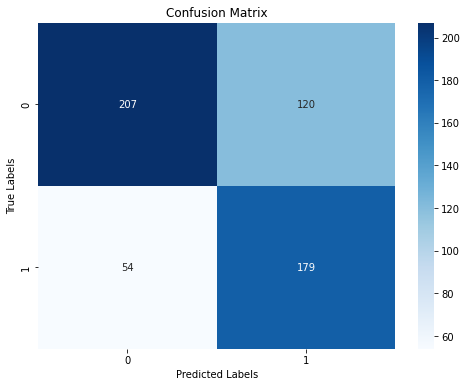

In [49]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_undersampled_randomsearch)

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [114]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_undersampled_randomsearch)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[207 120]
 [ 54 179]]


#### ROC Curve RF

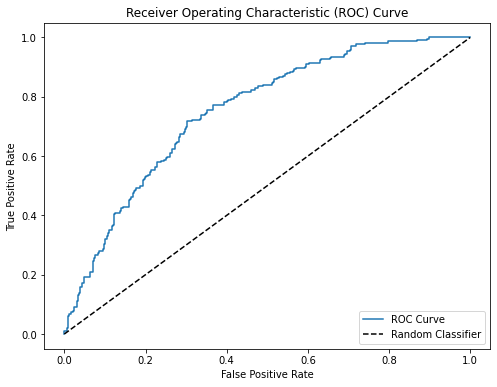

In [50]:
# Calculate the probabilities for ROC curve
y_probs = best_rf_classifier.predict_proba(X_test_encoded)
y_probs_positive = y_probs[:, 1]

# Calculate the false positive rate, true positive rate, and threshold for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Calculate the AUC for ROC curve
roc_auc = roc_auc_score(y_test, y_probs_positive)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Feature Importance - RF

In [51]:
# Obtain feature importances
feature_importances = best_rf_classifier.feature_importances_

# Create a dataframe to display feature importances
importance_df = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': feature_importances})

# Sort the dataframe by importance values in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Display the top 20 feature importances
top_20_importances = importance_df.head(20)
print("Top 20 Feature Importances:")
print(top_20_importances)

Top 20 Feature Importances:
                                              Feature  Importance
41                      support_type_Floating Support    0.133328
3                   num_keyworkers_per_day_in_service    0.095007
76                        service_region_South London    0.080394
5   num_outcome_star_sessions_offered_per_day_in_s...    0.065331
2     num_keywork_sessions_offered_per_day_in_service    0.050665
0                                      age_on_arrival    0.043906
58     needed_support_with_substance_misuse_issues_No    0.036586
47                     support_needs_level_Low/Medium    0.035675
1    num_attended_keywork_sessions_per_day_in_service    0.034163
4   num_attended_outcome_star_sessions_per_day_in_...    0.030257
71       frequency_of_action_plan_or_outcomes_star_30    0.014092
11                                        gender_Male    0.013638
45                           support_needs_level_High    0.013478
78                           service_region_York

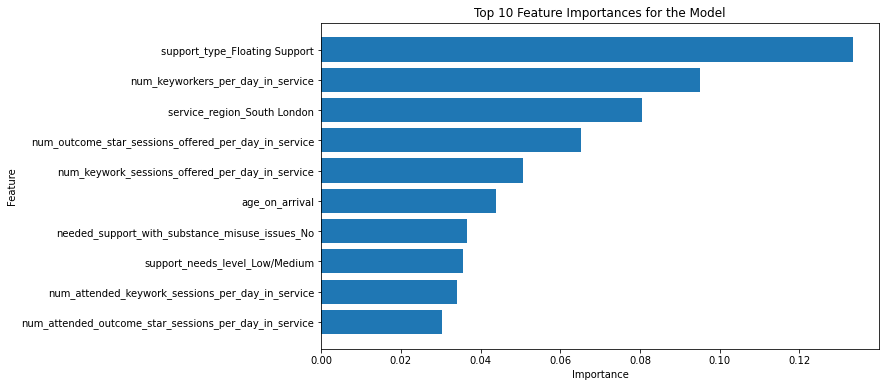

In [52]:
top_10_importances = importance_df.head(10)

# Reverse the order of the top 10 feature importances
top_10_importances = top_10_importances[::-1]

# Plot the top 10 feature importances with the largest bars at the top
plt.figure(figsize=(10, 6))
plt.barh(top_10_importances['Feature'], top_10_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances for the Model')
plt.show()

In [53]:
# show feature importances of both classes separately 
importance_df = importance_df.reset_index(drop=True)
importance_df['Target'] = y_train
importance_class_0 = importance_df[importance_df['Target'] == 0]
importance_class_1 = importance_df[importance_df['Target'] == 1]

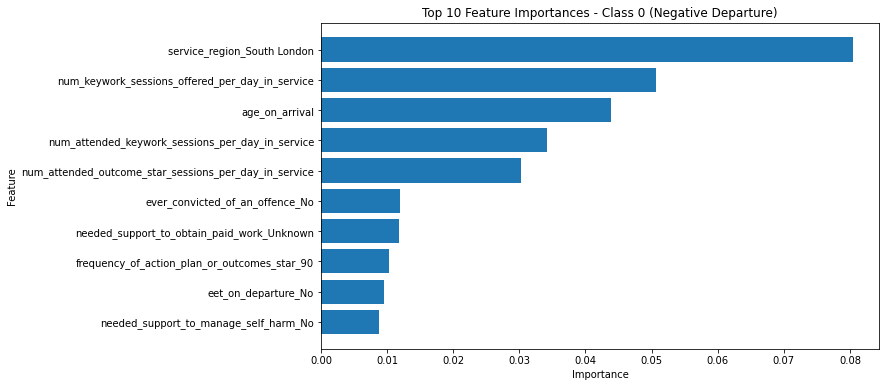

In [54]:
top_10_class_0 = importance_class_0.head(10)
# Reverse the order of the top 10 feature importances for Class 0
top_10_class_0 = top_10_class_0[::-1]

# Plot the top 10 feature importances for Class 0 with the largest bars at the top
plt.figure(figsize=(10, 6))
plt.barh(top_10_class_0['Feature'], top_10_class_0['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Class 0 (Negative Departure)')
plt.show()

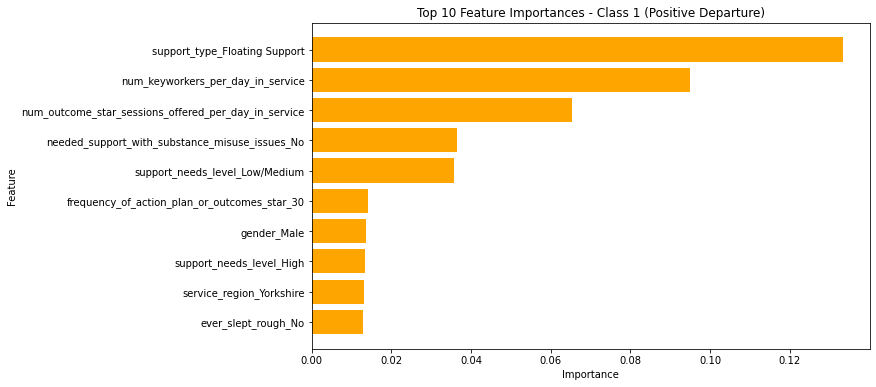

In [55]:
# Reverse the order of the top 10 feature importances for Class 0
top_10_class_1 = importance_class_1.head(10)
top_10_class_1 = top_10_class_1[::-1]

# Plot the top 10 feature importances for Class 0 with the largest bars at the top
plt.figure(figsize=(10, 6))
plt.barh(top_10_class_1['Feature'], top_10_class_1['Importance'], color = 'orange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Class 1 (Positive Departure)')
plt.show()

## More Random Search to Improve - Logistic Regression

In [103]:
# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=9)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_encoded, y_train)

# Define the parameter distributions for randomized search
param_dist = {
    'penalty': ['l2'],
    'C': uniform(loc=0.01, scale=10),
    'solver': ['lbfgs', 'liblinear'],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': randint(1000, 10000)
}

# Exclude incompatible combinations
if {'solver': 'liblinear', 'penalty': 'l2'} in param_dist['solver']:
    param_dist['solver'].remove('liblinear')
if {'solver': 'lbfgs', 'penalty': 'l1'} in param_dist['solver']:
    param_dist['solver'].remove('lbfgs')

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=100, cv=5, random_state=9)
random_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best model with optimal hyperparameters
best_logreg = random_search.best_estimator_

# Predict on the test data
y_pred_best = best_logreg.predict(X_test_encoded)

# Evaluate the model
accuracy_best = best_logreg.score(X_test_encoded, y_test)
print("Accuracy (Best Model):", accuracy_best)

# Generate and print the classification report
report_best = classification_report(y_test, y_pred_best)
print("\nClassification Report (Best Model):")
print(report_best)

# Calculate the F1 score
f1_score_best = f1_score(y_test, y_pred_best)
print("F1 Score (Best Model):", f1_score_best)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_best)
print("AUC Score (Best Model):", auc_score)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Accuracy (Best Model): 0.6321428571428571

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       327
           1       0.55      0.70      0.61       233

    accuracy                           0.63       560
   macro avg       0.64      0.64      0.63       560
weighted avg       0.65      0.63      0.63       560

F1 Score (Best Model): 0.6113207547169811
AUC Score (Best Model): 0.6412174666299169
Best Parameters: {'C': 0.3751912273127289, 'class_weight': None, 'fit_intercept': True, 'max_iter': 2137, 'penalty': 'l2', 'solver': 'liblinear'}


#### Confusion Matrix - Logistic Regression

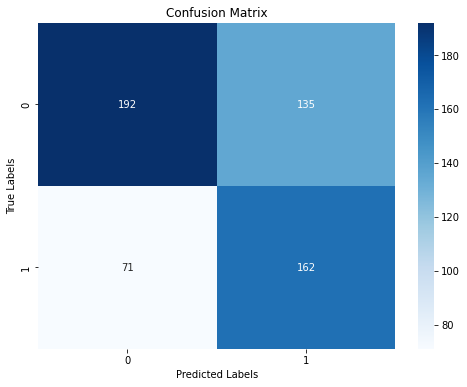

In [73]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [115]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[192 135]
 [ 71 162]]


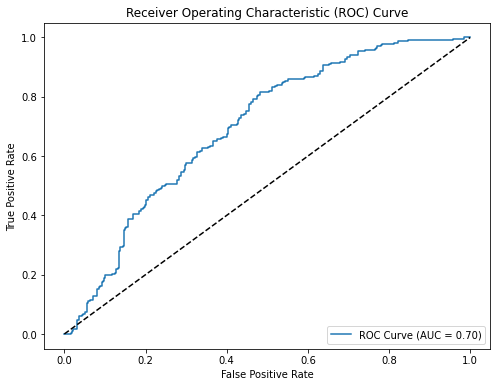

In [74]:
# Perform oversampling on the minority class using SMOTE
oversampler = SMOTE(random_state=9)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_encoded, y_train)

# Define the parameter distributions for randomized search
param_dist = {
    'penalty': ['l2'],
    'C': uniform(loc=0.01, scale=10),
    'solver': ['lbfgs', 'liblinear'],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': randint(1000, 10000)
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=100, cv=5, random_state=9)
random_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best model with optimal hyperparameters
best_logreg = random_search.best_estimator_

# Predict probabilities on the test data
y_pred_prob = best_logreg.predict_proba(X_test_encoded)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Random Forest to plot with Logistic Regression - ROC

In [59]:
# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=9)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_encoded, y_train)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=66)

# Define the parameter distributions for random search

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(5, 20)),
    'min_samples_leaf': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=9)
random_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best model with optimal hyperparameters
best_rf_classifier = random_search.best_estimator_

# Predict on the test data
y_pred_rf_undersampled_randomsearch = best_rf_classifier.predict(X_test_encoded)

# Calculate the F1 score
f1_rf_undersampled_randomsearch = f1_score(y_test, y_pred_rf_undersampled_randomsearch)

# Calculate the AUC
auc_rf_undersampled_randomsearch = roc_auc_score(y_test, y_pred_rf_undersampled_randomsearch)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Generate and print the classification report
report = classification_report(y_test, y_pred_rf_undersampled_randomsearch)
print("\nClassification Report:")
print(report)

# Print the F1 score
print("F1 Score:", f1_rf_undersampled_randomsearch)
print("AUC:", auc_rf_undersampled_randomsearch)

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 10, 'n_estimators': 360}

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       327
           1       0.60      0.77      0.67       233

    accuracy                           0.69       560
   macro avg       0.70      0.70      0.69       560
weighted avg       0.71      0.69      0.69       560

F1 Score: 0.6729323308270677
AUC: 0.7006339331417096


#### Plotting ROC together

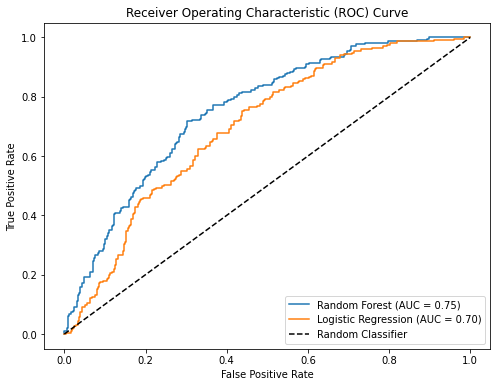

In [60]:
# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=9)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_encoded, y_train)

# Random Forest model
rf_classifier = RandomForestClassifier(random_state=66)

# Define the parameter distributions for random search
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(5, 20)),
    'min_samples_leaf': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

# Perform random search with cross-validation
random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_dist_rf, n_iter=10, cv=5, random_state=9)
random_search_rf.fit(X_train_undersampled, y_train_undersampled)

# Get the best model with optimal hyperparameters
best_rf_classifier = random_search_rf.best_estimator_

# Predict on the test data
y_pred_rf = best_rf_classifier.predict(X_test_encoded)

# Calculate the probabilities for ROC curve
y_pred_rf_prob = best_rf_classifier.predict_proba(X_test_encoded)[:, 1]

# Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Fit the model
logreg_model.fit(X_train_undersampled, y_train_undersampled)

# Predict on the test data
y_pred_logreg_prob = logreg_model.predict_proba(X_test_encoded)[:, 1]

# Calculate the fpr and tpr for the Random Forest model
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf_prob)
rf_auc = roc_auc_score(y_test, y_pred_rf_prob)

# Calculate the fpr and tpr for the Logistic Regression model
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, y_pred_logreg_prob)
logreg_auc = roc_auc_score(y_test, y_pred_logreg_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Feature Importance - Logistic Regression

In [116]:
coefficients = best_logreg.coef_
feature_names = X_train_encoded.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients.flatten()})
importance_df['Absolute Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)
print("Feature Importance (Overall):")
print(importance_df)

Feature Importance (Overall):
                                        Feature  Coefficient  \
41                support_type_Floating Support    -1.249327   
74            service_region_North West England    -1.116851   
70  frequency_of_action_plan_or_outcomes_star_0     0.579684   
42        support_type_Independent Living (FMT)     0.543961   
18               days_in_service_band_Years 2-5     0.541182   
..                                          ...          ...   
35                   economic_status_Job seeker    -0.017053   
38               economic_status_Part time work    -0.016065   
26          ever_run_away_from_home_under_16_No     0.014185   
16             days_in_service_band_Months 6-12    -0.009781   
25             ever_convicted_of_an_offence_Yes    -0.002812   

    Absolute Coefficient  
41              1.249327  
74              1.116851  
70              0.579684  
42              0.543961  
18              0.541182  
..                   ...  
35          

In [117]:
top_20_importance = importance_df.nlargest(20, 'Absolute Coefficient')
print("Top 20 Feature Importance (Overall):")
print(top_20_importance)

Top 20 Feature Importance (Overall):
                                            Feature  Coefficient  \
41                    support_type_Floating Support    -1.249327   
74                service_region_North West England    -1.116851   
70      frequency_of_action_plan_or_outcomes_star_0     0.579684   
42            support_type_Independent Living (FMT)     0.543961   
18                   days_in_service_band_Years 2-5     0.541182   
73                service_region_North East England     0.478714   
33                   economic_status_Full time work    -0.443588   
50       needed_support_to_obtain_paid_work_Unknown    -0.383328   
37                 economic_status_Not seeking work     0.375544   
14                  days_in_service_band_Months 0-3    -0.375517   
56        needed_support_with_mental_health_Unknown    -0.366266   
71     frequency_of_action_plan_or_outcomes_star_30    -0.341640   
44                    support_type_Visiting Support     0.338872   
51         

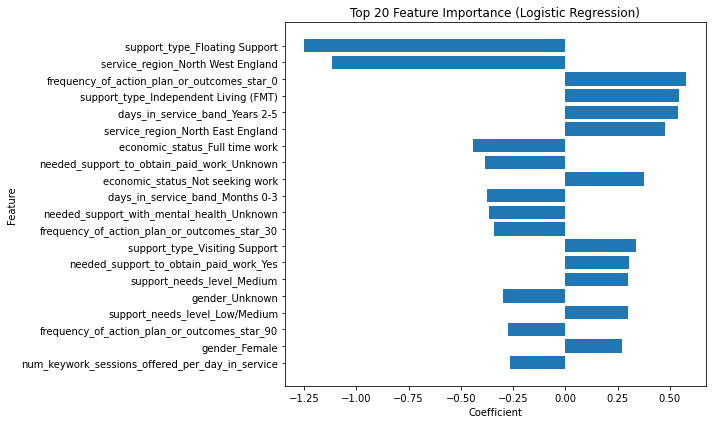

In [118]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_importance['Feature'], top_20_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features on top
plt.tight_layout()

# Show the plot
plt.show()

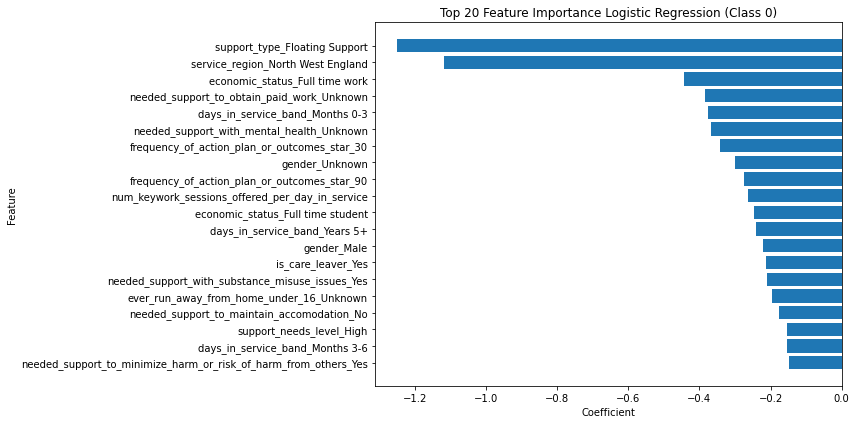

In [119]:
# Get the top 20 feature importance for class 0
top_20_importance_class_0 = importance_df[importance_df['Coefficient'] < 0].nlargest(20, 'Absolute Coefficient')

# Create a bar plot for class 0
plt.figure(figsize=(12, 6))
plt.barh(top_20_importance_class_0['Feature'], top_20_importance_class_0['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance Logistic Regression (Class 0)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features on top
plt.tight_layout()

# Show the plot for class 0
plt.show()

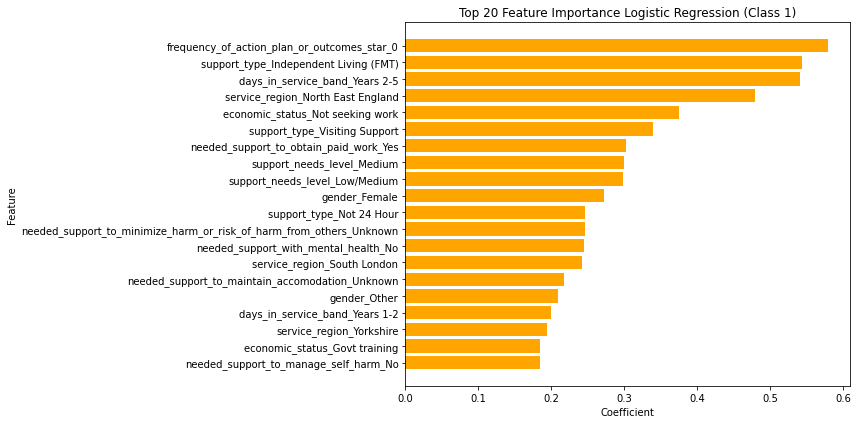

In [120]:
# Get the top 20 feature importance for class 1
top_20_importance_class_1 = importance_df[importance_df['Coefficient'] > 0].nlargest(20, 'Absolute Coefficient')

# Create a bar plot for class 1
plt.figure(figsize=(12, 6))
plt.barh(top_20_importance_class_1['Feature'], top_20_importance_class_1['Coefficient'], color='orange')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance Logistic Regression (Class 1)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features on top
plt.tight_layout()

# Show the plot for class 1
plt.show()

In [121]:
top_10_importance = importance_df.nlargest(10, 'Absolute Coefficient')
print("Top 10 Feature Importance (Overall):")
print(top_10_importance)

Top 10 Feature Importance (Overall):
                                        Feature  Coefficient  \
41                support_type_Floating Support    -1.249327   
74            service_region_North West England    -1.116851   
70  frequency_of_action_plan_or_outcomes_star_0     0.579684   
42        support_type_Independent Living (FMT)     0.543961   
18               days_in_service_band_Years 2-5     0.541182   
73            service_region_North East England     0.478714   
33               economic_status_Full time work    -0.443588   
50   needed_support_to_obtain_paid_work_Unknown    -0.383328   
37             economic_status_Not seeking work     0.375544   
14              days_in_service_band_Months 0-3    -0.375517   

    Absolute Coefficient  
41              1.249327  
74              1.116851  
70              0.579684  
42              0.543961  
18              0.541182  
73              0.478714  
33              0.443588  
50              0.383328  
37             

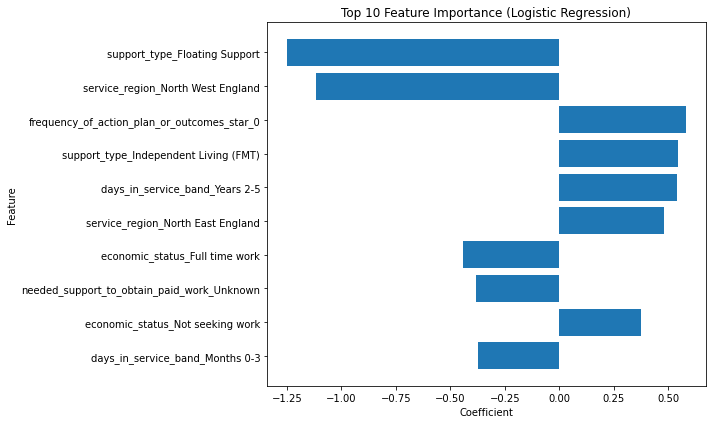

In [123]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_importance['Feature'], top_10_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features on top
plt.tight_layout()

# Show the plot
plt.show()

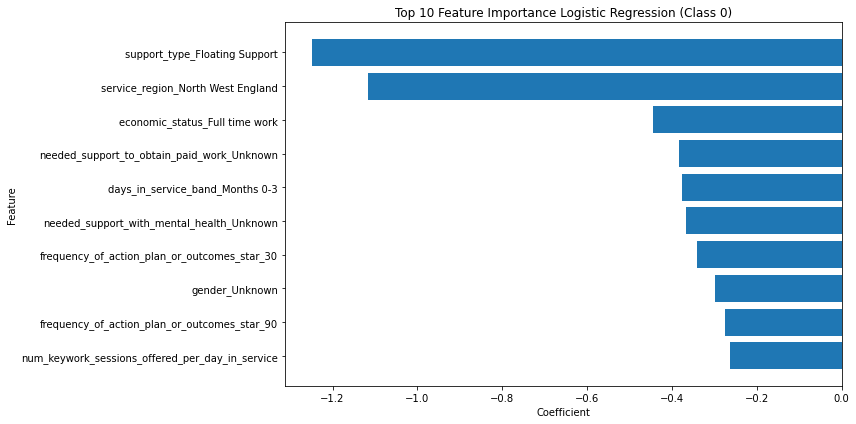

In [124]:
# Get the top 20 feature importance for class 0
top_10_importance_class_0 = importance_df[importance_df['Coefficient'] < 0].nlargest(10, 'Absolute Coefficient')

# Create a bar plot for class 0
plt.figure(figsize=(12, 6))
plt.barh(top_10_importance_class_0['Feature'], top_10_importance_class_0['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance Logistic Regression (Class 0)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features on top
plt.tight_layout()

# Show the plot for class 0
plt.show()

In [126]:
# Get the top 10 feature importance for class 0
top_10_importance_class_0 = importance_df[importance_df['Coefficient'] < 0].nlargest(10, 'Absolute Coefficient')

# Create a list of tuples containing feature and coefficient values
top_10_list = list(zip(top_10_importance_class_0['Feature'], top_10_importance_class_0['Coefficient']))

# Print the list
print("Top 10 Feature Importance Logistic Regression (Class 0):")
for feature, coefficient in top_10_list:
    print(f"Feature: {feature}, Coefficient: {coefficient:.3f}")

Top 10 Feature Importance Logistic Regression (Class 0):
Feature: support_type_Floating Support, Coefficient: -1.249
Feature: service_region_North West England, Coefficient: -1.117
Feature: economic_status_Full time work, Coefficient: -0.444
Feature: needed_support_to_obtain_paid_work_Unknown, Coefficient: -0.383
Feature: days_in_service_band_Months 0-3, Coefficient: -0.376
Feature: needed_support_with_mental_health_Unknown, Coefficient: -0.366
Feature: frequency_of_action_plan_or_outcomes_star_30, Coefficient: -0.342
Feature: gender_Unknown, Coefficient: -0.299
Feature: frequency_of_action_plan_or_outcomes_star_90, Coefficient: -0.275
Feature: num_keywork_sessions_offered_per_day_in_service, Coefficient: -0.263


| Feature                                      | Coefficient | Interpretation                                            |
|----------------------------------------------|-------------|-----------------------------------------------------------|
| support_type_Floating Support               | -1.249      | For each unit increase in Floating Support, the odds of a negative outcome decrease by 1.249 times.                                  |
| service_region_North West England           | -1.117      | For each unit increase in North West England service region, the odds of a negative outcome decrease by 1.117 times.             |
| economic_status_Full time work              | -0.444      | For each unit increase in Full-time work economic status, the odds of a negative outcome decrease by 0.444 times.          |
| needed_support_to_obtain_paid_work_Unknown  | -0.383      | For each unit increase in Unknown needed support to obtain paid work, the odds of a negative outcome decrease by 0.383 times.   |
| days_in_service_band_Months 0-3             | -0.376      | For each unit increase in Months 0-3 in service band, the odds of a negative outcome decrease by 0.376 times.                      |
| needed_support_with_mental_health_Unknown   | -0.366      | For each unit increase in Unknown needed support with mental health, the odds of a negative outcome decrease by 0.366 times.  |
| frequency_of_action_plan_or_outcomes_star_30| -0.342      | For each unit increase in frequency of Action Plan or Outcomes Star 30, the odds of a negative outcome decrease by 0.342 times.|
| gender_Unknown                              | -0.299      | For each unit increase in Unknown gender, the odds of a negative outcome decrease by 0.299 times.                                 |
| frequency_of_action_plan_or_outcomes_star_90| -0.275      | For each unit increase in frequency of Action Plan or Outcomes Star 90, the odds of a negative outcome decrease by 0.275 times.|
| num_keywork_sessions_offered_per_day_in_service|-0.263    | For each unit increase in the number of keywork sessions offered per day in service, the odds of a negative outcome decrease by 0.263 times.|


When the logistic regression model assigns a higher positive coefficient to a feature, it means that an increase in that feature's value is associated with a higher likelihood of belonging to class 1 (positive class). Conversely, when the model assigns a higher negative coefficient to a feature, it means that an increase in that feature's value is associated with a lower likelihood of belonging to class 0 (negative class). The absolute value of the coefficients represents the magnitude of the impact that each feature has on the probability of the corresponding class.

The sign of the coefficient is essential in logistic regression because it determines the direction of the relationship between the feature and the class probabilities. A positive coefficient implies a positive association with the positive class, while a negative coefficient indicates a negative association with the negative class.

Therefore, in your logistic regression model, the feature importance shows negative coefficients for class 0 (negative class) because an increase in those features is associated with a decrease in the probability of being in class 0 (or increase in the probability of being in class 1). Similarly, positive coefficients for class 1 (positive class) indicate that an increase in those features is associated with an increase in the probability of being in class 1.

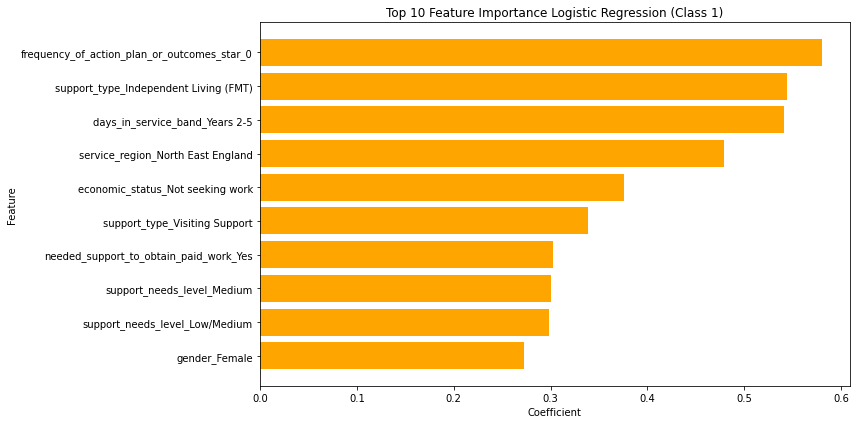

In [125]:
# Get the top 20 feature importance for class 1
top_10_importance_class_1 = importance_df[importance_df['Coefficient'] > 0].nlargest(10, 'Absolute Coefficient')

# Create a bar plot for class 1
plt.figure(figsize=(12, 6))
plt.barh(top_10_importance_class_1['Feature'], top_10_importance_class_1['Coefficient'], color='orange')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance Logistic Regression (Class 1)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features on top
plt.tight_layout()

# Show the plot for class 1
plt.show()

In [127]:
# Get the top 20 feature importance for class 1
top_10_importance_class_1 = importance_df[importance_df['Coefficient'] > 0].nlargest(10, 'Absolute Coefficient')

# Print the top 10 feature importance for class 1 as a list
print("Top 10 Feature Importance Logistic Regression (Class 1):")
for index, row in top_10_importance_class_1.iterrows():
    print(f"Feature: {row['Feature']}, Coefficient: {row['Coefficient']:.3f}")

Top 10 Feature Importance Logistic Regression (Class 1):
Feature: frequency_of_action_plan_or_outcomes_star_0, Coefficient: 0.580
Feature: support_type_Independent Living (FMT), Coefficient: 0.544
Feature: days_in_service_band_Years 2-5, Coefficient: 0.541
Feature: service_region_North East England, Coefficient: 0.479
Feature: economic_status_Not seeking work, Coefficient: 0.376
Feature: support_type_Visiting Support, Coefficient: 0.339
Feature: needed_support_to_obtain_paid_work_Yes, Coefficient: 0.303
Feature: support_needs_level_Medium, Coefficient: 0.300
Feature: support_needs_level_Low/Medium, Coefficient: 0.298
Feature: gender_Female, Coefficient: 0.273


| Feature                                         | Coefficient | Interpretation                                               |
| ----------------------------------------------- | ----------- | ------------------------------------------------------------ |
| frequency_of_action_plan_or_outcomes_star_0     | 0.580       | Higher frequency of action plan or outcomes star (0 days) is associated with a higher chance of positive outcomes. |
| support_type_Independent Living (FMT)           | 0.544       | Receiving support for independent living (FMT) is positively correlated with positive outcomes. |
| days_in_service_band_Years 2-5                  | 0.541       | Staying in the service for 2 to 5 years (days_in_service_band_Years 2-5) is positively linked to positive outcomes. |
| service_region_North East England               | 0.479       | Being in the North East England region (service_region_North East England) is associated with positive outcomes. |
| economic_status_Not seeking work                | 0.376       | Not actively seeking work (economic_status_Not seeking work) has a positive coefficient, indicating a higher likelihood of positive outcomes. |
| support_type_Visiting Support                   | 0.339       | Receiving Visiting Support (support_type_Visiting Support) is positively associated with positive outcomes. |
| needed_support_to_obtain_paid_work_Yes          | 0.303       | Needing support to obtain paid work (needed_support_to_obtain_paid_work_Yes) is positively correlated with positive outcomes. |
| support_needs_level_Medium                      | 0.300       | Having medium-level support needs (support_needs_level_Medium) is positively related to positive outcomes. |
| support_needs_level_Low/Medium                  | 0.298       | Having low to medium-level support needs (support_needs_level_Low/Medium) is positively related to positive outcomes. |
| gender_Female                                   | 0.273       | Being Female (gender_Female) has a positive coefficient, suggesting a higher likelihood of positive outcomes. |

| Feature                                         | Coefficient | Log Odds Interpretation                                      |
| ----------------------------------------------- | ----------- | ------------------------------------------------------------ |
| frequency_of_action_plan_or_outcomes_star_0     | 0.580       | For every unit increase in the frequency of action plan or outcomes star (0 days), the log odds of positive outcomes increase by 0.580. |
| support_type_Independent Living (FMT)           | 0.544       | Being in the Independent Living (FMT) support type is associated with a 0.544 increase in the log odds of positive outcomes. |
| days_in_service_band_Years 2-5                  | 0.541       | Staying in the service for 2 to 5 years (days_in_service_band_Years 2-5) is linked to a 0.541 increase in the log odds of positive outcomes. |
| service_region_North East England               | 0.479       | Being in the North East England region is associated with a 0.479 increase in the log odds of positive outcomes. |
| economic_status_Not seeking work                | 0.376       | Not seeking work (economic_status_Not seeking work) has a positive coefficient, leading to a 0.376 increase in the log odds of positive outcomes. |
| support_type_Visiting Support                   | 0.339       | Receiving Visiting Support is positively associated with a 0.339 increase in the log odds of positive outcomes. |
| needed_support_to_obtain_paid_work_Yes          | 0.303       | Needing support to obtain paid work (needed_support_to_obtain_paid_work_Yes) is correlated with a 0.303 increase in the log odds of positive outcomes. |
| support_needs_level_Medium                      | 0.300       | Having medium-level support needs (support_needs_level_Medium) is associated with a 0.300 increase in the log odds of positive outcomes. |
| support_needs_level_Low/Medium                  | 0.298       | Having low to medium-level support needs (support_needs_level_Low/Medium) is associated with a 0.298 increase in the log odds of positive outcomes. |
| gender_Female                                   | 0.273       | Being Female is associated with a 0.273 increase in the log odds of positive outcomes. |

A negative coefficient indicates that as the corresponding feature increases, the log-odds or log-odds ratio of the class being considered (in this case, class 0) decreases.

In the context of feature importance, a negative coefficient suggests that a higher value of the feature is associated with a lower likelihood of belonging to class 0. It means that the presence or increase of that feature decreases the probability of the instance being classified as class 0.



In [67]:
# Count the instances of each class in the training dataset
class_counts = y_train.value_counts()

# Print the class counts
print("Class Counts:")
print(class_counts)

Class Counts:
move_to_live_independently
0    1406
1     833
Name: count, dtype: int64


In [68]:
# Count the instances of each class in the testing dataset
class_counts = y_test.value_counts()

# Print the class counts
print("Testing Class Counts:")
print(class_counts)

Testing Class Counts:
move_to_live_independently
0    327
1    233
Name: count, dtype: int64
